In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


In [2]:
#custom imports

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MeanShift
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium

In this project we will assist HELP International to decide which country requires the financial support based on socio-economic status of the country. We will use some unsupervised learning algorithms to find the right countires for the need of aid. 

Let's understand the columns provided in this dataset. 

**Country** - Name of the Country <br>
**child_mort** - Death of children under 5 years of age per 1000 live births <br>
**exports** - Exports of goods and services per capita. Given as percentage of the GDP per capita <br>
**health** - Total health spending per capita. Given as percentage of GDP per capita <br>
**imports** - Imports of goods and services per capita. Given as percentage of the GDP per capita <br>
**Income** - Net income per person <br>
**Inflation** - The measurement of the annual growth rate of the Total GDP <br>
**life_expec** - The average number of years a new born child would live if the current mortality patterns are to remain the same <br>
**total_fer** - The number of children that would be born to each woman if the current age-fertility rates remain the same. <br>
**gdpp** - The GDP per capita. Calculated as the Total GDP divided by the total population. <br>


In [3]:
#get the dataframe 
df = pd.read_csv("../input/unsupervised-learning-on-country-data/Country-data.csv")

In [4]:
#overview of the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Cleaning and Data Wrangling
Firstly, we will check for the datatypes of each column. 

In [5]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
df.shape

(167, 10)

All the data types seems to be correct for that feature.

Secondly, we will check for missing or null values.

In [7]:
df.isnull().value_counts()

country  child_mort  exports  health  imports  income  inflation  life_expec  total_fer  gdpp 
False    False       False    False   False    False   False      False       False      False    167
dtype: int64

There seems to be no missing values in this dataset. 

# Exploratory Data Analysis

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Let's try to visualize the mean, standard deviation and interquartile range to get better idea of the spread of the data. We will separate GDPP and Net income from the other features for visualization because as seen from Max values there is huge difference between each feature.

Text(0, 0.5, 'Value')

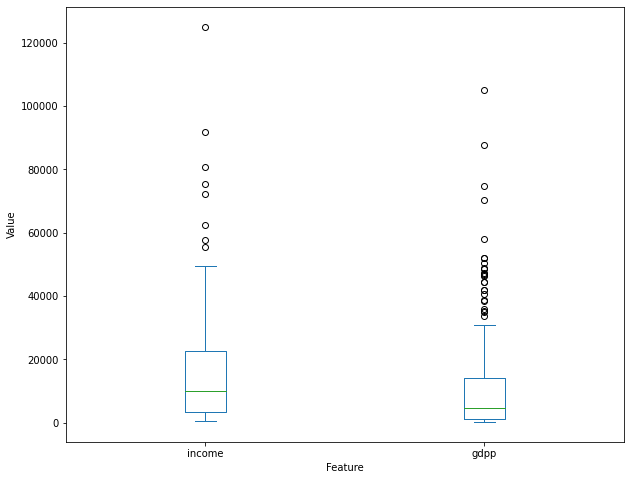

In [9]:
#fig,ax = plt.subplots(figsize=(10,8))
df[['income','gdpp']].plot(kind='box', figsize=(10,8))
plt.xlabel("Feature")
plt.ylabel("Value")


Text(0, 0.5, 'Value')

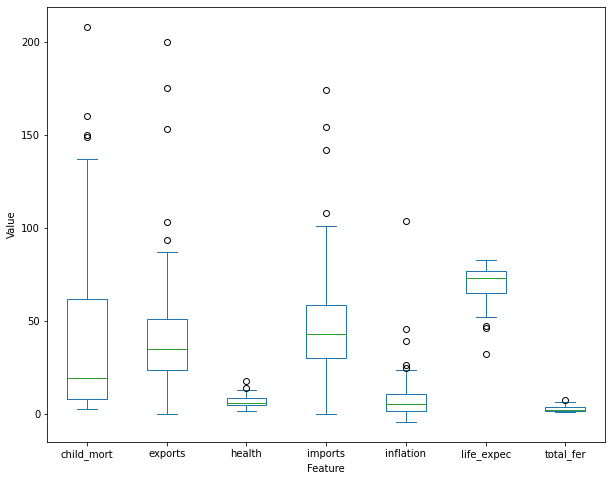

In [10]:
df[['child_mort','exports','health','imports','inflation','life_expec','total_fer']].plot(kind='box', figsize=(10,8))
plt.xlabel("Feature")
plt.ylabel("Value")

There are few outliers for all these features for some unknown reasons. It needs more in-depth knowledge to deal with them. Plotting histograms will provide more insights. 

array([[<AxesSubplot:title={'center':'child_mort'}>,
        <AxesSubplot:title={'center':'exports'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'imports'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'inflation'}>],
       [<AxesSubplot:title={'center':'life_expec'}>,
        <AxesSubplot:title={'center':'total_fer'}>,
        <AxesSubplot:title={'center':'gdpp'}>]], dtype=object)

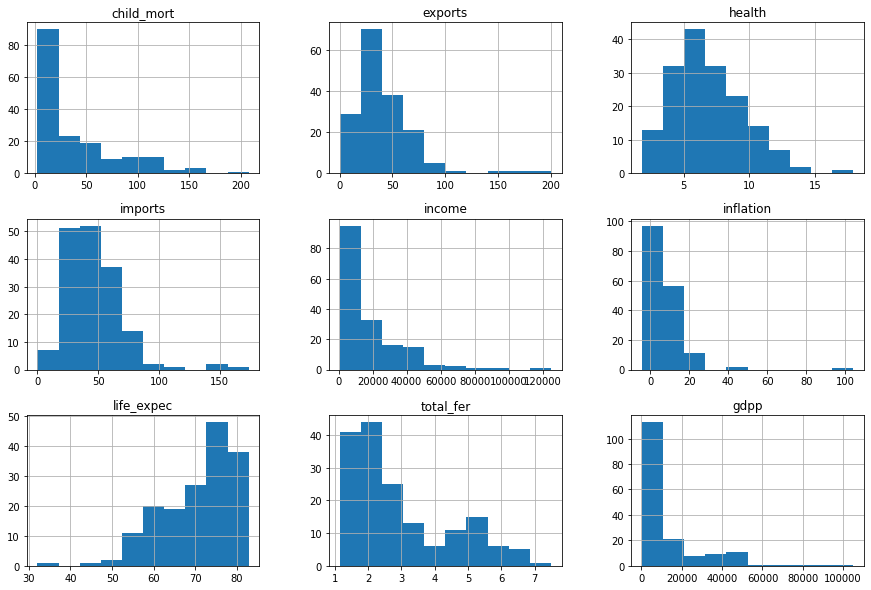

In [11]:
df.hist(figsize=(15,10))

All of these features appears to be highly skewed. Distance Based Spatial Clustering of Applications With Noise, inshort DBSCAN, can be used here which specifically leave out the outliers from clustering the data. We will use DBSCAN algorithm for clustering initially and then we will try to compare the accuracy with other clustering methods like K-means and Mean Shift. 

## Scaling data

Scaling the data is important as the values of different features show a high range of differences and this could lead to errors in the distacne calculation. By generalizing the data points the distance can be lowered between them thus bringing them to similar level. 

In [12]:
#removing the country column from the main dataset
df_final = df.iloc[:, 1:]
df_final

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
#Creating an object of StandardScaler
scaled = StandardScaler()

#fitting and tranforming the data to a new dataframe 
df_scaled = pd.DataFrame(scaled.fit_transform(df_final), columns =df_final.columns)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


Plotting the box plots again to visualize the scaled data distrbution. 


<AxesSubplot:title={'center':'box plots of scaled data'}>

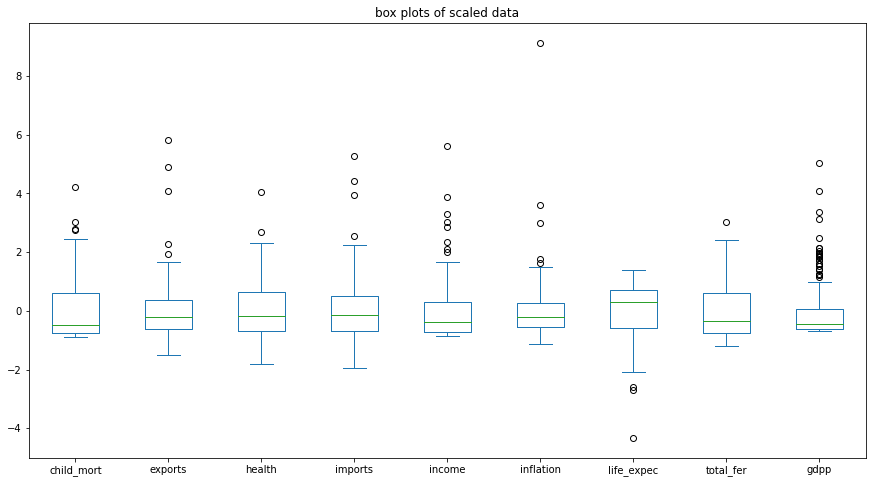

In [14]:
df_scaled.plot(kind='box', figsize=(15,8), title="box plots of scaled data")

The data is nicely scaled to bring the values of all columns to a comparable smaller range. 

Before we proceed with DBSCAN, there are two main important parameters that needs to be decided or estimated. One is Epsilon which is a considered as a radius that will cover the nearest point to expand the cluster. Second is min_samples which is the mininum number of samples in that radius of epsilon. 

To find right epsilon we will use NearestNeighbors algorithm from sklearn. 

In [15]:
#creating an object for NearestNeighbors
nbrs = NearestNeighbors(n_neighbors =4)  # for k=4, it will find 3 nearest neighbors

#getting the distances and indices by fitting the scaled data to the model nbrs
distances, indices = nbrs.fit(df_scaled).kneighbors(df_scaled)

#sorting the distance values in ascending order
distances = np.sort(distances, axis=0)

#filter the distance to not have first column of zeros have 
#distances = distances[:,1:]

In [16]:
#plotting the line plot of distances
px.line(distances, title = "Nearest Neighbor distance values for each Index")

These four lines indicates the column number for the "distances" array and as the first column is 0, we see a blue line corresoinding to that in the above plot. Higher values of distances indicates heavy outliers as the distance from the core point to neighbor points increases. 

Now discussing about where the curve makes an elbow here,it can be inferred that for all the curved lines elbow starts to form around at 1. If we consider the red line then the value can be estimated to be around 1.2-1.4 and specifically 1.24. So we will use an epsilon of 1.24 and minimum samples per radius of epsilon to be 4.  

## DBSCAN algorithm

In [17]:
#create an object for DBSCAN
classify_db = DBSCAN(eps=1.24, min_samples=3)

#fit the data to the object
classify_db.fit(df_scaled)

#generate the labels 
labels = classify_db.labels_

#add the labels to the original main dataframe
df['class'] = list(labels)

#check the silhouette score
score = silhouette_score(df_scaled, labels)

print(f'Average silhouette score is {score}')

Average silhouette score is 0.13554366371098675


The average silhouette score is very low and indicates overlapping clusters with DBSCAN method. We need to compare this with other clustering algorithms to find the best one.

In [18]:
df.groupby('class')['country'].count()

class
-1    39
 0    27
 1    78
 2    19
 3     4
Name: country, dtype: int64

Let's visualize the countries classified as per the labeling done in DBSCAN method. For this we will use plotly and choropleth libraries to map the countries.

In [19]:


px.choropleth(df, locationmode='country names',locations='country', color='class',
                           color_discrete_map = {'-1':'red', '0':'blue',
                                  '1':'yellow', '2':'green'},
                           labels={'unemp':'unemployment rate'}
                          )

In [20]:
px.choropleth(df, locationmode='country names',locations='country', color='health',
            
             )

## K Means Clustering

Let's also confirm the value of clusters using the elbow method

Text(0.5, 1.0, 'Inertia vs number of clusters')

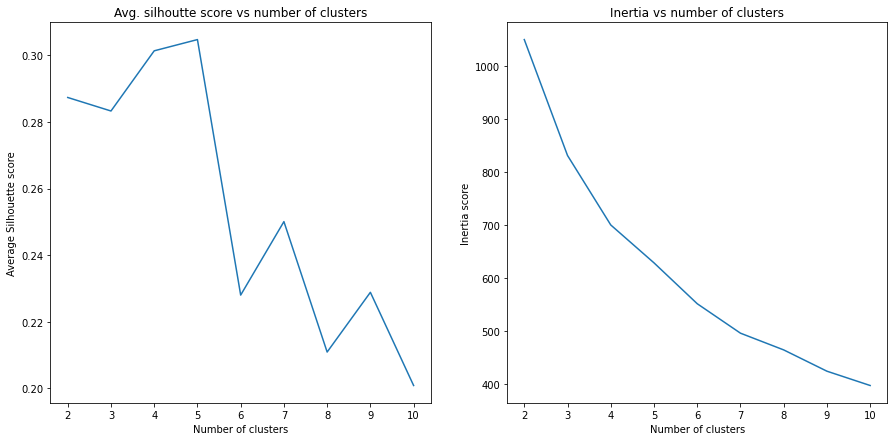

In [21]:
'''
A function that will run the Kmeans classifier and provide labels. 
The labels will be used as classes column for the dataframe and 
function will also return average silhouette score. Inertia is also 
calculated and returned as a list for number of clusters.

'''
def kmeans(n):
    #create a Kmeans object
    classify_km = KMeans(n_clusters=n, random_state=24)

    #fit the data to the model
    classify_km.fit(df_scaled)

    #get the labels
    KM_labels = classify_km.labels_

    df.drop('class', axis=1, inplace=True)
    df['class'] = list(KM_labels)

    #check the silhouette score
    score = silhouette_score(df_scaled, KM_labels)
    inertia = classify_km.inertia_
    return score, inertia

#create an empty list to store average silhouette sore values for kmeans
sill_score = []
inertia =[]
#loop through the range of k vakues to get its respective score
for i in range(2,11):
    sill_score.append(kmeans(i)[0])
    inertia.append(kmeans(i)[1])
    

#plot the line graph for silhouette score 
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(range(2,11),sill_score)
ax[0].set_xlabel("Number of clusters")
ax[0].set_ylabel("Average Silhouette score")
ax[0].set_title("Avg. silhoutte score vs number of clusters")

#plot the line graph for inertia values 
ax[1].plot(range(2,11),inertia)
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("Inertia score")
ax[1].set_title("Inertia vs number of clusters")


Average Silhouette score is highest 0.3 at value of 5 clusters. So we will take 5 clusters for K means algorithm. The elbow curve is not useful visually but it can be said that the silhouette score maxes as 5 clusters and the elbow occurs at 5 as well. 

In [22]:
score = kmeans(5)
print(f'Average silhoutte score for K means is {score}')

Average silhoutte score for K means is (0.30475221266676467, 628.8066422564431)


In [23]:
#plotting the classes and countries 
px.choropleth(df, locationmode='country names',locations='country', color='class',
                           color_continuous_scale="Plasma",
                           labels={'unemp':'unemployment rate'}
                          )

In [24]:
#assigning labels column to scaled dataframe
df_scaled['class'] = df['class']

#creating a dataframe that has only mean values of each feature for all classes
polar= df_scaled.groupby('class').mean().reset_index()
print(polar)

polar = pd.melt(polar,id_vars=["class"])
polar

   class  child_mort   exports    health   imports    income  inflation  \
0      0    0.484065 -0.278413 -0.611878 -0.676287 -0.382826   5.242572   
1      1    1.292620 -0.441377 -0.163124 -0.170610 -0.690788   0.200143   
2      2   -0.849003  4.935673 -0.008163  4.548058  2.439542  -0.504206   
3      3   -0.434852  0.024526 -0.193803  0.065845 -0.203380  -0.114173   
4      4   -0.828609  0.172621  0.859190 -0.296373  1.462275  -0.478189   

   life_expec  total_fer      gdpp  
0   -0.359671   0.465138 -0.372346  
1   -1.261473   1.306997 -0.606493  
2    1.226824  -1.038863  2.440797  
3    0.297828  -0.459087 -0.324708  
4    1.107649  -0.763681  1.661902  


,class,variable,value
0,0,child_mort,0.484065
1,1,child_mort,1.292620
2,2,child_mort,-0.849003
3,3,child_mort,-0.434852
4,4,child_mort,-0.828609
5,0,exports,-0.278413
6,1,exports,-0.441377
7,2,exports,4.935673
8,3,exports,0.024526
9,4,exports,0.172621


In [25]:
#checking the categories and counts of countries
df_scaled['class'].value_counts()

3    83
1    48
4    30
2     3
0     3
Name: class, dtype: int64

In [26]:
fig = px.line_polar(polar, r="value", theta="variable", color="class", line_close=True, template="plotly_dark")
fig.show()

Let's try to divide the countries according to the labels.

In [27]:
df[df['class']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,4
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,4
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,4
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,4
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,4
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,4
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,4
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,4
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,4
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,4


In [28]:
df[df['class']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [29]:
df[df['class']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500,0


In [30]:
df[df['class']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,3
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,3
...,...,...,...,...,...,...,...,...,...,...,...
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,3
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,3
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,3
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3


In [31]:
df[df['class']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1


Let us provide the names to the labels. 

0 - First Priority Nations <br>
1 - Second Priority Nations  <br>
2 - Very Well Developed <br>
3 - Developing Nations <br>
4 - Well Developed <br>

In [32]:
df['class'] = df['class'].astype(str)

#make a new column called class names
df['class_name'] = df['class']

#add a new column with class descriptions called class_name
df['class_name'] = df['class_name'].replace({'0':'First Priority Nations','1':'Second Priority Nations','2':'Very Well Developed','3':'Developing Nations','4':'Well Developed'})

In [33]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,class_name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Second Priority Nations
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,Developing Nations
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,Developing Nations
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Second Priority Nations
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,Developing Nations


In [34]:
#adding the className column to the scaled data

df_scaled['class_name'] = df['class_name']

In [35]:
#Again create a polar chart to visulize the countries acoording to class names
#grouping by class and getting mean values
polar_new = df_scaled.groupby('class').mean().reset_index()

#converting the dataframe
polar_new = pd.melt(polar_new, id_vars=['class'])

#creating a new column class_name in polar_new
polar_new['class_name'] = polar_new['class']

#changing the data type of class_name to object
polar_new['class_name'] = polar_new['class_name'].astype(str)

#replacing the categorical values to class names
polar_new['class_name'] = polar_new['class_name'].replace({'0':'First Priority Nations','1':'Second Priority Nations','2':'Very Well Developed','3':'Developing Nations','4':'Well Developed'})

polar_new

,class,variable,value,class_name
0,0,child_mort,0.484065,First Priority Nations
1,1,child_mort,1.292620,Second Priority Nations
2,2,child_mort,-0.849003,Very Well Developed
3,3,child_mort,-0.434852,Developing Nations
4,4,child_mort,-0.828609,Well Developed
5,0,exports,-0.278413,First Priority Nations
6,1,exports,-0.441377,Second Priority Nations
7,2,exports,4.935673,Very Well Developed
8,3,exports,0.024526,Developing Nations
9,4,exports,0.172621,Well Developed


In [36]:
#plot the polar chart
fig = px.line_polar(polar_new, r="value", theta="variable", color="class_name", line_close=True, template="plotly_dark")
fig.show()

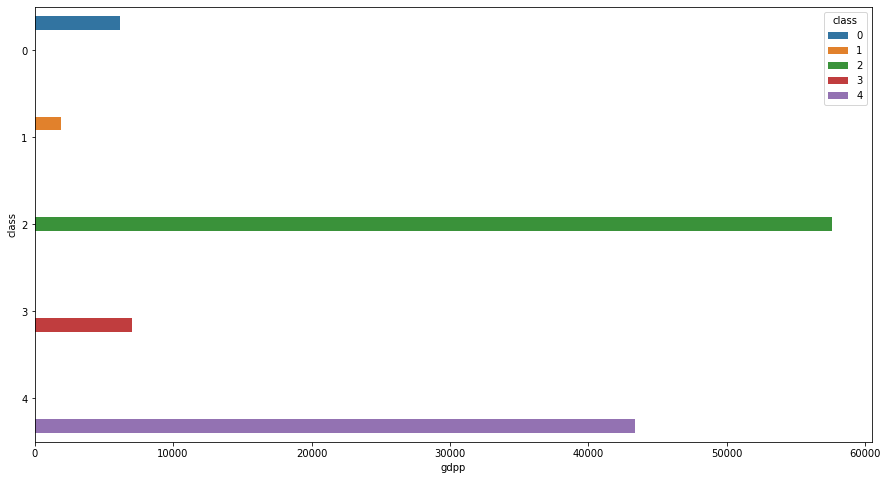

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
df_bar = df.groupby('class').mean().reset_index()
fig = sns.barplot(x='gdpp', y='class',data=df_bar, hue='class')


# Socio Economic Factors

Some of the most important socio economic factors are child mortality rate, net income per person, health spending, import, export, GDP, etc. We will viusalize these factors for different countires below and try to compare with the clusters we have established.

### Net income per person

In [38]:
px.choropleth(df, locationmode='country names',locations='country', color='income',
                           color_continuous_scale="rdbu", title="Net income per person"
                          )

## Child Mortality rate

In [39]:
px.choropleth(df, locationmode='country names',locations='country', color='child_mort',
                           color_continuous_scale="burgyl", title="Child mortality rate"
                          )

We can observe high mortality rate in African continent and then in south asian countries as well. How does it relate to health spending, we will visualize next. 

### Health Spending per Country

In [40]:
px.choropleth(df, locationmode='country names',locations='country', color='health',
                           color_continuous_scale="burgyl", title="Health Expenditure"
                          )

Countires with highest health expenditure are from north america as well as western Europe. High levels of GDP per capita leads to higher budgets for health and in turn higher life expectancy. 

## Conclusion

1. DBSCAN takes care of the outliers, however it does not provide the best clusters of the countries as per the expectation. 
2. DBSCAN also has low silhouette score compared to K-means
3. K means proved to be a better method to cluster the countries requiring the aid. Silhouette score was found to be greater than DBSCAN method and elbow method indicated a cluster of five. 
4. The number of countries are divided into five categories with two of them requiring atmost attention in terms of financial aid. 
5. There are 3 countries that showed very high inflation rate, lowest GDP and have been categorized as First Priority nations. 

To Summarize following are the countries that need the attention and financial aid.



In [41]:
df[(df['class_name'] == 'First Priority Nations') | (df['class_name'] == 'Second Priority Nations')].country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
103     